In [1]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from matplotlib import style
style.use("fivethirtyeight")

In [2]:
#Read the csv file into a DataFrame
df = pd.read_csv(r"Tesla_share.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
df.tail(30)

,Date,Open,High,Low,Close,Volume,Adj Close
1662,2/3/2017,251.910004,252.179993,249.679993,251.330002,2186700,251.330002
1663,2/6/2017,251.000000,257.820007,250.630005,257.769989,3562500,257.769989
1664,2/7/2017,258.190002,260.000000,256.420013,257.480011,4244800,257.480011
1665,2/8/2017,257.350006,263.359985,256.200012,262.079987,3933000,262.079987
1666,2/9/2017,266.250000,271.179993,266.149994,269.200012,7820200,269.200012
1667,2/10/2017,269.790009,270.950012,266.109985,269.230011,3619700,269.230011
1668,2/13/2017,270.739990,280.790009,270.510010,280.600006,7029600,280.600006
1669,2/14/2017,279.029999,287.390015,278.609985,280.980011,7329400,280.980011
1670,2/15/2017,280.000000,282.239990,276.440002,279.760010,4935600,279.760010
1671,2/16/2017,277.600006,280.000000,268.500000,268.950012,7053800,268.950012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
#Make two new columns which will be used for making predictions.
df["HL_Perc"] = (df["High"]-df["Low"]) / df["Low"] * 100
df["CO_Perc"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [8]:
dates = np.array(df["Date"])
dates_check = dates[-30:]
#print(dates_check)
dates = dates[:-30]
print(dates)

['6/29/2010' '6/30/2010' '7/1/2010' ... '1/31/2017' '2/1/2017' '2/2/2017']


In [9]:
df = df[["HL_Perc", "CO_Perc", "Adj Close", "Volume"]]

In [10]:
df.head(31)

,HL_Perc,CO_Perc,Adj Close,Volume
0,42.531349,25.736837,23.889999,18766300
1,30.557946,-7.599848,23.830000,17187100
2,27.873705,-12.160004,21.959999,8218800
3,23.463395,-16.521735,19.200001,5139800
4,26.342388,-19.449995,16.110001,6866900
5,11.014680,-3.658537,15.800000,6921700
6,12.524085,8.178439,17.459999,7711400
7,8.157106,-1.023891,17.400000,4050600
8,6.294118,-5.013938,17.049999,2202500
9,10.295852,4.312824,18.139999,2680100


In [11]:
#Define the label column
#Adjclose ka value 30 days shift karega 

df["PriceNextMonth"] = df["Adj Close"].shift(-30)
print(df['PriceNextMonth'].head(30))

0     17.900000
1     17.600000
2     18.320000
3     18.780001
4     19.150000
5     18.770000
6     18.790001
7     19.100000
8     20.129999
9     19.200001
10    19.900000
11    19.750000
12    19.700001
13    19.870001
14    19.480000
15    20.450001
16    21.059999
17    21.049999
18    20.540001
19    20.900000
20    20.709999
21    20.170000
22    20.719999
23    21.120001
24    21.980000
25    20.940001
26    20.230000
27    21.059999
28    20.770000
29    19.870001
Name: PriceNextMonth, dtype: float64


In [12]:
df.tail()

,HL_Perc,CO_Perc,Adj Close,Volume,PriceNextMonth
1687,1.676418,0.551422,246.169998,3010700,NaN
1688,4.918296,4.831173,258.000000,7575500,NaN
1689,2.646791,-0.494165,255.729996,4816600,NaN
1690,2.582414,-0.133386,262.049988,7100400,NaN
1691,1.581154,-0.946970,261.500000,6475900,NaN


In [13]:
print(df.drop(["PriceNextMonth"], 1))

        HL_Perc    CO_Perc   Adj Close    Volume
0     42.531349  25.736837   23.889999  18766300
1     30.557946  -7.599848   23.830000  17187100
2     27.873705 -12.160004   21.959999   8218800
3     23.463395 -16.521735   19.200001   5139800
4     26.342388 -19.449995   16.110001   6866900
...         ...        ...         ...       ...
1687   1.676418   0.551422  246.169998   3010700
1688   4.918296   4.831173  258.000000   7575500
1689   2.646791  -0.494165  255.729996   4816600
1690   2.582414  -0.133386  262.049988   7100400
1691   1.581154  -0.946970  261.500000   6475900

[1692 rows x 4 columns]


<ipython-input-13-e647dd370755>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  print(df.drop(["PriceNextMonth"], 1))


In [14]:
#Make fetaure and label arrays
X = np.array(df.drop(["PriceNextMonth"], 1))
print(X)

X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
df.dropna(inplace = True)
y = np.array(df["PriceNextMonth"])

[[ 4.25313488e+01  2.57368368e+01  2.38899990e+01  1.87663000e+07]
 [ 3.05579455e+01 -7.59984848e+00  2.38300000e+01  1.71871000e+07]
 [ 2.78737050e+01 -1.21600040e+01  2.19599990e+01  8.21880000e+06]
 ...
 [ 2.64679116e+00 -4.94164981e-01  2.55729996e+02  4.81660000e+06]
 [ 2.58241413e+00 -1.33386436e-01  2.62049988e+02  7.10040000e+06]
 [ 1.58115422e+00 -9.46969697e-01  2.61500000e+02  6.47590000e+06]]


<ipython-input-14-67283027fae5>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(["PriceNextMonth"], 1))


In [15]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
#Define the prediction model
model = RandomForestRegressor()

In [17]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9586637158938087


In [19]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [20]:
predictions = model.predict(X_Check)

In [21]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])

actual["ClosePrice"] = df["Adj Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
print(actual)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame
print(result.tail(20))

           ClosePrice  Forecast
Date                           
6/29/2010   23.889999       NaN
6/30/2010   23.830000       NaN
7/1/2010    21.959999       NaN
7/2/2010    19.200001       NaN
7/6/2010    16.110001       NaN
...               ...       ...
1/27/2017  252.949997       NaN
1/30/2017  250.630005       NaN
1/31/2017  251.929993       NaN
2/1/2017   249.240005       NaN
2/2/2017   251.550003       NaN

[1662 rows x 2 columns]
           ClosePrice    Forecast
Date                             
2/17/2017         NaN  251.924001
2/21/2017         NaN  240.078398
2/22/2017         NaN  238.403801
2/23/2017         NaN  223.722000
2/24/2017         NaN  247.593901
2/27/2017         NaN  215.682298
2/28/2017         NaN  246.006097
3/1/2017          NaN  237.415300
3/2/2017          NaN  242.568803
3/3/2017          NaN  251.005701
3/6/2017          NaN  262.288404
3/7/2017          NaN  226.256000
3/8/2017          NaN  241.645898
3/9/2017          NaN  241.925196
3/10/2017      

Text(0, 0.5, 'Price')

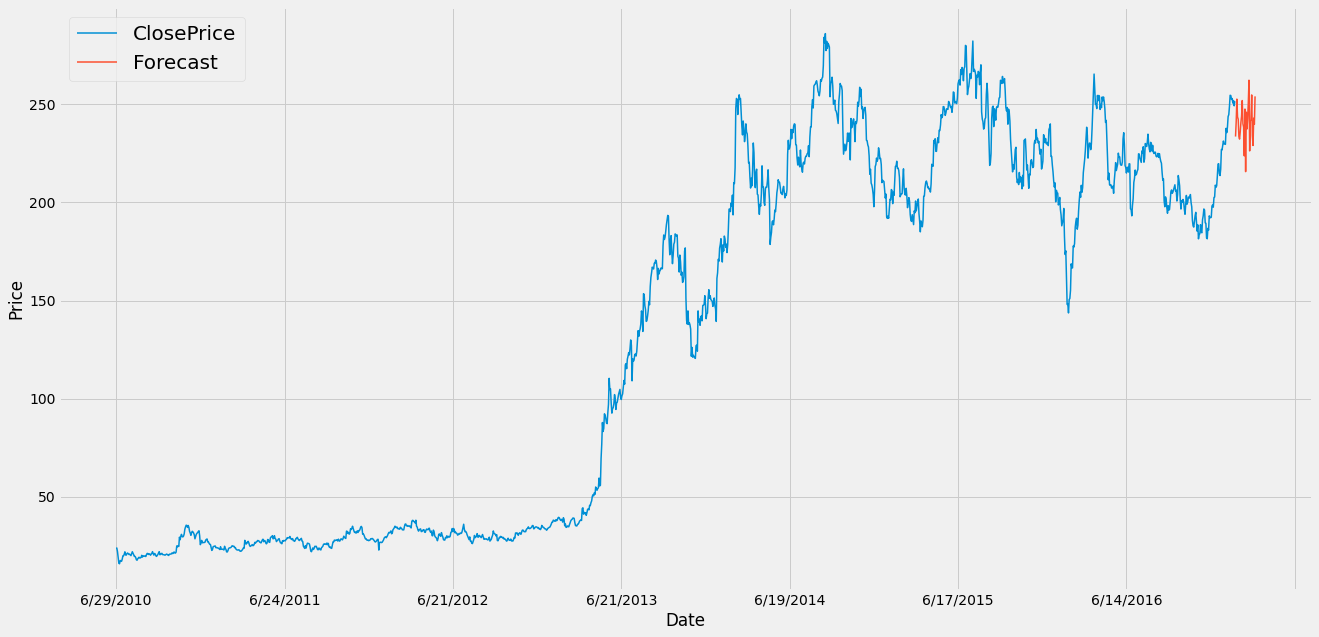

In [22]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')